# Visualize Drugs NMR Result

In [12]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [14]:
# making folder for saving figures
os.makedirs("fig", exist_ok=True)

In [15]:
element = "C"
# 12drugs or 40drugs
data_type = "12drugs"
# data_type = "40drugs"
test_result_csv_path = (
    f"/workspace/result/NMR/{element}/{element}_{data_type}_compare_mae_fchl.csv"
)

In [16]:
df = pd.read_csv(test_result_csv_path)
df = df[df["atomic_symbol"] == element]
df = df.sort_values("compounds_name", ascending=False)
df = df.dropna()

In [17]:
len(df)

12

In [18]:
compounds_names = list(df["compounds_name"])

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import datetime

In [20]:
width = 0.15
line_width = 0.5
alpha = 0.5

In [21]:
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0.03

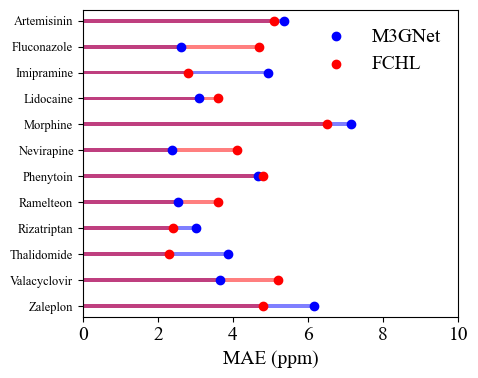

In [22]:
# 可視化する。
import matplotlib.pyplot as plt

# データの設定
compounds_names = list(df["compounds_name"])
fchl_mae_values = list(df["fchl_mae"])
m3gnet_mae_values = list(df["m3gnet_mae"])

plt.rcParams["font.size"] = 14

# (5,4) looks nice for 12drugs, (5,6) looks nice for 40drugs
plt.rcParams["figure.figsize"] = (5, 4)
# plt.rcParams["figure.figsize"] = (5, 6)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"

# plotting
plt.barh(compounds_names, m3gnet_mae_values, color="blue", alpha=alpha, height=width)
plt.barh(compounds_names, fchl_mae_values, color="red", alpha=alpha, height=width)
plt.scatter(m3gnet_mae_values, compounds_names, color="blue", label="M3GNet")
plt.scatter(fchl_mae_values, compounds_names, color="red", label="FCHL")

# print(compounds_names)
plt.legend(frameon=False)
plt.xlim(0, 10)
plt.yticks(rotation=0, fontsize=9)
plt.xlabel("MAE (ppm)")
plt.tight_layout()

# upper setting for 12drugs, the other for 40drugs
plt.xticks([0, 2, 4, 6, 8, 10])
# plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

plt.savefig(f"./fig/{data_type}_result", dpi=300)